Word2Vec 란
  - Word2Vec은 단어를 벡터로 변환하는 딥러닝 기반 자연어 처리 기법
  - 주어진 말뭉치(corpus)에서 단어 간 의미적 유사도를 학습하여, 단어를 고차원 공간에 실수 벡터로 표현
  - Word2Vec에는 CBOW(Continuous Bag of Words)모델과 Skip-gram 모델 두가지 있습니다

Word2Vec은 신경망을 이용해서 단어의 의미적 관계를 학습

1. CBOW모델(Continuous Bag of Words)
  - 주변단어(context word)를 입력으로 받아  중심 단어(target word)를 예측하는 방식
  - CBOW 구조 예
    - 예제문장
      - "The cat sits on the mat"
      - 여기서 center word가 "sits"라고 하면 CBOW 모델은 "The",'cat','on','the' 를 보고 'sits'를 예측하도록 학습
      - 학습목표 확률을 최대화
      - P(wt|wt-2, wt-1,wt+1,wt+2)
      - 중심단어 wt가 주변단어들 wt-2, wt-1,wt+1,wt+2로부터 예측될 확률을 최대화 하는 것을 의미함

2.skip-gram 구조
  - CBOW와 반대 .중심단어(target word)를 입력받아서 주변단어를(context word)를 예측
  - 예제문장
      - "The cat sits on the mat"
      - center word 'sits'라고 하면 skip-gram모델은 'The','cat','on','the'를 예측하도록 학습
      - P(wt-2, wt-1,wt+1,wt+2|wt)
      - 중심단어 wt가 주변단어들 wt-2, wt-1,wt+1,wt+2로부터 예측될 확률을 최대화 하는 것을 의미함

In [ ]:
# word2vec의 학습과정
# 1. 말뭉치 준비(Corpus) : 텍스트 데이터를 수집하고 전처리
# 2. 윈도우 크기 설정 : 모델을 선택(2가지 중 하나), 단어를 예측할 주변 단어의 개수를 선택
# 3. one-hot-encoding : 벡터로 변환후에 신경망을 통해 저차원 벡터로 임베딩
# 4. 신경망 학습 : Softmax 등을 이용해서 목표단어를 예측하면서 가중치를 조정해서 의미적 유사한 단어들이 가까이 위치하도록 학습

데이터 준비

In [ ]:
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')  # nltk에서 제공하는 문장 및 단어 토큰화 도구
nltk.download('punkt_tab')  # 문장 토크나이져하고 단어 토크나이져가 작동할때 내부적으로 참조하는 규칙파일

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# 예제문장
sentences = [
   "The cat sits on the mat.",
    "The dog barks at the mailman.",
    "The cat and the dog are friends.",
    "The mat is under the table.",
    "The mailman delivers letters to the house."
]
# 토큰화
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

In [ ]:
sentences[0].lower(), word_tokenize(sentences[0].lower())

('the cat sits on the mat.', ['the', 'cat', 'sits', 'on', 'the', 'mat', '.'])

In [ ]:
tokenized_sentences

[['the', 'cat', 'sits', 'on', 'the', 'mat', '.'],
 ['the', 'dog', 'barks', 'at', 'the', 'mailman', '.'],
 ['the', 'cat', 'and', 'the', 'dog', 'are', 'friends', '.'],
 ['the', 'mat', 'is', 'under', 'the', 'table', '.'],
 ['the', 'mailman', 'delivers', 'letters', 'to', 'the', 'house', '.']]

In [ ]:
# word2vec 모델 학습
# vector_size 각 단어의 벡터 차원 수  기본 값이 100 (추천 : 50 ~ 300)
# 50 :  작은모델(빠르지만 표현력이 낮음)
# 100 적절함
# 300 : 큰 모델(의미표현력이 높지만 학습 속도가 느려짐)
# window=2 주변단어를  학습할때 개수   기본값은 5
# min_count = 1 : 모든 단어를 학습(작은 데이터셋 적합)
# min_count = 5 : 5번 미만 등장한단어는 무시(노이즈제거 효과)
# sg = 1  기본값은 CBOW 모델... 1은 skip-gram(중심 단어를보고 주변단어를 예측)
model = Word2Vec(sentences = tokenized_sentences, vector_size=100,window=2,min_count=1,sg=1)
# 단어 벡터 확인
model.wv['cat']


array([-8.2426779e-03,  9.2993546e-03, -1.9766092e-04, -1.9672764e-03,
        4.6036304e-03, -4.0953159e-03,  2.7431143e-03,  6.9399667e-03,
        6.0654259e-03, -7.5107943e-03,  9.3823504e-03,  4.6718083e-03,
        3.9661205e-03, -6.2435055e-03,  8.4599797e-03, -2.1501649e-03,
        8.8251876e-03, -5.3620026e-03, -8.1294188e-03,  6.8245591e-03,
        1.6711927e-03, -2.1985089e-03,  9.5136007e-03,  9.4938548e-03,
       -9.7740470e-03,  2.5052286e-03,  6.1566923e-03,  3.8724565e-03,
        2.0227872e-03,  4.3050171e-04,  6.7363144e-04, -3.8206363e-03,
       -7.1402504e-03, -2.0888723e-03,  3.9238976e-03,  8.8186832e-03,
        9.2591504e-03, -5.9759365e-03, -9.4026709e-03,  9.7643770e-03,
        3.4297847e-03,  5.1661171e-03,  6.2823449e-03, -2.8042626e-03,
        7.3227035e-03,  2.8302716e-03,  2.8710044e-03, -2.3803699e-03,
       -3.1282497e-03, -2.3701417e-03,  4.2764368e-03,  7.6057913e-05,
       -9.5842788e-03, -9.6655441e-03, -6.1481940e-03, -1.2856961e-04,
      

In [ ]:
# 유사도측정  cat과 유사한 단어 찾기
model.wv.most_similar('cat')

[('table', 0.1782098263502121),
 ('mailman', 0.1315031200647354),
 ('are', 0.07490666210651398),
 ('.', 0.06790068745613098),
 ('is', 0.04151185601949692),
 ('at', 0.04121294617652893),
 ('sits', 0.041170384734869),
 ('to', 0.012966764159500599),
 ('under', 0.006594092585146427),
 ('house', -0.0018632792634889483)]

단어 벡터 시각화

['the', '.', 'dog', 'cat', 'mat', 'mailman', 'is', 'friends', 'are', 'and', 'to', 'at', 'barks', 'under', 'table', 'delivers', 'on', 'sits', 'letters', 'house']
(20, 100)


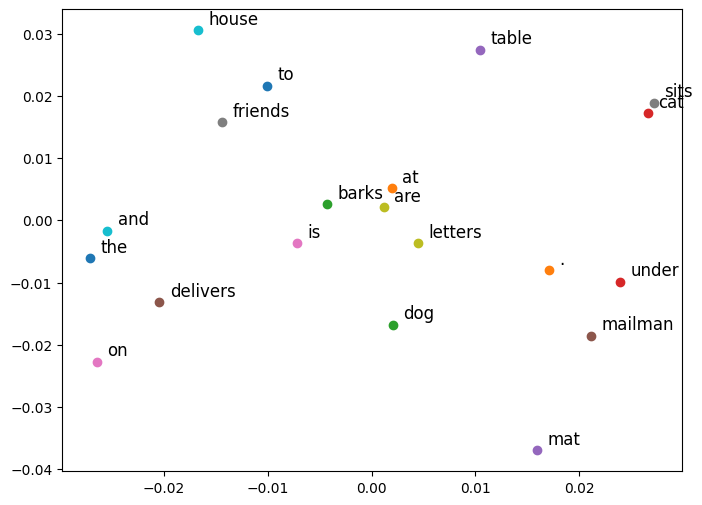

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA  # 차원 축소  100차원 데이터를 2차원으로 축소해서 시각화
# 단어 벡터추출(상위 10개 단어만 사용)
words = list(model.wv.key_to_index.keys())[:50]
print(words)
word_vectors = [model.wv[word]  for word in words]
print(np.array(word_vectors).shape)
# PCA 로 2차원 축소
pca = PCA(n_components=2)
word_vecs_2d = pca.fit_transform(word_vectors)

# 시각화
plt.figure(figsize=(8,6))  # 크기
for word, (x,y) in zip(words, word_vecs_2d):
  plt.scatter(x,y)
  plt.text(x+0.001, y+0.001,word, fontsize=12)
plt.show()

응용 : 유사도 계산

In [ ]:
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity  # 단어간 유사도 계산 함수
nltk.download('punkt')  # nltk에서 제공하는 문장 및 단어 토큰화 도구
nltk.download('punkt_tab')  # 문장 토크나이져하고 단어 토크나이져가 작동할때 내부적으로 참조하는 규칙파일

# 샘플 문서 데이터
documents = [
    "The cat sits on the mat.",
    "The dog barks at the mailman.",
    "A kitten is playing with a ball.",
    "The puppy is running in the park.",
    "The mailman delivers letters every morning."
]

# 문장 토큰화
tokenized_sentences = [word_tokenize(doc.lower()) for doc in documents]
# word2vec 모델 학습
model = Word2Vec(sentences=tokenized_sentences, vector_size=100, window=2, min_count=1, sg=1)  # sg=1  word2vec   min_count=1 --> 소규모데이터

# 문장을 벡터로 변환 - 함수화
def document_vector(doc):
  words = word_tokenize(doc.lower())  # 100개의 벡터로 변환
  word_vectors = [model.wv[word] for word in words if word in model.wv]
  return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

# 모든 문서를 벡터화
doc_vectors = np.array([document_vector(doc) for doc in documents])

# 문서 간 코사인 유사도 계산
similarities_matrix = cosine_similarity(doc_vectors)
# 결과 출력
import pandas as pd
df = pd.DataFrame(similarities_matrix, index=documents, columns=documents)
df

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,The cat sits on the mat.,The dog barks at the mailman.,A kitten is playing with a ball.,The puppy is running in the park.,The mailman delivers letters every morning.
The cat sits on the mat.,1.000000,0.633000,0.208872,0.595126,0.303833
The dog barks at the mailman.,0.633000,1.000000,0.025271,0.536730,0.461127
A kitten is playing with a ball.,0.208872,0.025271,1.000000,0.312381,0.170074
The puppy is running in the park.,0.595126,0.536730,0.312381,1.000000,0.405266
The mailman delivers letters every morning.,0.303833,0.461127,0.170074,0.405266,1.000000


응용

In [ ]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize

In [ ]:
# sent_tokenize
# 긴 텍스트를 문장 단위로 나누는 함수
# 마침표(.) 느낌표(!) 물음표(?)등을 기준으로 문장을 분류

데이터 다운로드

In [ ]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7e9e2021ae50>)

In [ ]:
targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)  # 딕셔너리 구조로 데이터를 가져온다.

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))  # 리스트의 문장들을 하나의 문장으로 합치기

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]


In [ ]:
print('총 단어의수(샘플의 수)', len(result))

총 단어의수(샘플의 수) 273424


In [ ]:
result[:3]

[['here',
  'are',
  'two',
  'reasons',
  'companies',
  'fail',
  'they',
  'only',
  'do',
  'more',
  'of',
  'the',
  'same',
  'or',
  'they',
  'only',
  'do',
  'what',
  's',
  'new'],
 ['to',
  'me',
  'the',
  'real',
  'real',
  'solution',
  'to',
  'quality',
  'growth',
  'is',
  'figuring',
  'out',
  'the',
  'balance',
  'between',
  'two',
  'activities',
  'exploration',
  'and',
  'exploitation'],
 ['both',
  'are',
  'necessary',
  'but',
  'it',
  'can',
  'be',
  'too',
  'much',
  'of',
  'a',
  'good',
  'thing']]

In [ ]:
# word2vec 훈련시키기
# KeyedVectors 클래스  -- word2vec의 단어벡터을 저장하고 불러오는 클래스  - 직접학습하지 않고 이미 학습된 world2vec모델을 로드할때 사용
#    googloe의 사전학습 world2vec 모델(GooleNews-vectors)등을 사용할때 유용
from gensim.models import word2vec, KeyedVectors
# sg = 0 CBOW모델
# min_count=5  단어 등장횟수의 빈도가 5이하면 무시
# 중심단어를가지고 주변 단어를 유추
model = word2vec.Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

In [ ]:
model.wv.most_similar('man')

[('woman', 0.8661726713180542),
 ('guy', 0.8046524524688721),
 ('lady', 0.7809346318244934),
 ('boy', 0.7635815143585205),
 ('girl', 0.7433361411094666),
 ('soldier', 0.7153382897377014),
 ('gentleman', 0.7129762768745422),
 ('rabbi', 0.6958296298980713),
 ('surgeon', 0.6921601891517639),
 ('poet', 0.68125981092453)]

모델을 저장하고 불러오기

In [ ]:
model.wv.save_word2vec_format('eng_w2v')  # 모델저장
# 로드
loaded_model = KeyedVectors.load_word2vec_format('eng_w2v')

In [ ]:
loaded_model.most_similar('man')

[('woman', 0.8661726713180542),
 ('guy', 0.8046524524688721),
 ('lady', 0.7809346318244934),
 ('boy', 0.7635815143585205),
 ('girl', 0.7433361411094666),
 ('soldier', 0.7153382897377014),
 ('gentleman', 0.7129762768745422),
 ('rabbi', 0.6958296298980713),
 ('surgeon', 0.6921601891517639),
 ('poet', 0.68125981092453)]

한국어 Word2vec (네이버 영화리뷰)
  - konlpy는 한국여 형태소 분석기 - 따로 다운로드

In [2]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 22.6 MB/s eta 0:00:00


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

네이버 영화리뷰 데이터셋

In [5]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")


('ratings.txt', <http.client.HTTPMessage at 0x7bc4d937ec10>)

In [6]:
train_data = pd.read_table('ratings.txt')
train_data[:3]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1


In [7]:
len(train_data)

200000

전처리 - 결측치 확인하고 제거

In [8]:
# 결측치 존재유무
train_data.isnull().values.any()

True

In [9]:
# 결측치가있는 행을 제거한후 다시 확인
train_data = train_data.dropna(how='any')
train_data.isnull().values.any()

False

In [10]:
len(train_data)

199992

한글만 선택(한글외 문자는 제거)

In [11]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","",regex=True)
train_data[:3]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1


불용어 제거
  - 의 가 어 이 은 들  이러한 단어들을 말한다.

In [12]:
from tqdm import tqdm
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
# 형태소 분석기를 통해 토큰화  Okt()
okt = Okt()
tokenized_data = []
for sentence in tqdm(train_data['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [13:12<00:00, 252.31it/s]


In [13]:
print("리뷰의 최대길이", max(len(l) for l in tokenized_data))
print("리뷰의 평균길이", sum(map(len, tokenized_data))/len(tokenized_data))

리뷰의 최대길이 72
리뷰의 평균길이 10.716703668146726


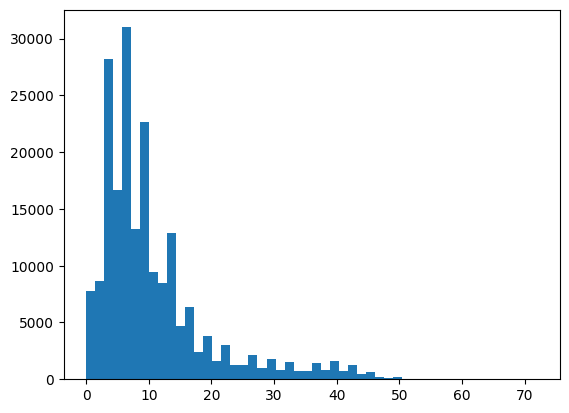

In [14]:
plt.hist([len(review) for review  in tokenized_data], bins=50)
plt.show()

학습

In [16]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=tokenized_data, vector_size=100, window=5, min_count=5, workers=4, sg=0)  # sg=0 CBOW
model.wv.vectors.shape  # 메트릭스 크기 확인

(16477, 100)

In [18]:
model.wv.most_similar('재미있다')

[('재밌다', 0.9229249358177185),
 ('재다', 0.8088038563728333),
 ('실망하다', 0.6252898573875427),
 ('괜찮다', 0.5725588202476501),
 ('오래되다', 0.5575091242790222),
 ('재미없다', 0.5394431948661804),
 ('낫다', 0.5253726840019226),
 ('흥미진진', 0.5176489353179932),
 ('재밋', 0.5053156614303589),
 ('웃기다', 0.5033372044563293)]